In [1]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_romo_mod import WorkingMemoryEnv
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_performance_matrix, plot_mean_firing_rate_trace, load_model, save_model

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-08-27 10:30:20.412945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756283422.609861  169544 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756283423.211034  169544 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756283428.308185  169544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756283428.308211  169544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756283428.308213  169544 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 20000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...


2025-08-25 16:27:11.815677: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.

Starting training for 20000 episodes...
Episode 100	Total Reward: -1.00	State [1.       0.       8.394951]	Actor Loss: -1.3138	Critic Loss: 0.9138	Actions: [0, 0, 3, 1]	M: 0.5347593880377696	Tau: 4	
Episode 200	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -1.2876	Critic Loss: 0.8605	Actions: [1]	M: 0.5347593582887701	Tau: 4	
Episode 300	Total Reward: -1.00	State [ 1.        0.       18.333513]	Actor Loss: -0.9873	Critic Loss: 0.5100	Actions: [3, 2]	M: 0.5347593582887701	Tau: 4	
Episode 400	Total Reward: -1.00	State [1. 0. 0.]	Actor Loss: -0.6111	Critic Loss: 0.2304	Actions: [3, 2]	M: 0.5347593582887701	Tau: 4	
Episode 500	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.6015	Critic Loss: 0.1905	Actions: [2]	M: 0.5347593582887701	Tau: 4	
Episode 600	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: 0.0047	Critic Loss: 0.1967	Actions: [0, 0, 2]	M: 0.5347593582887701	Tau: 4	
Episode 700	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.2925	Critic Loss: 0.0479	

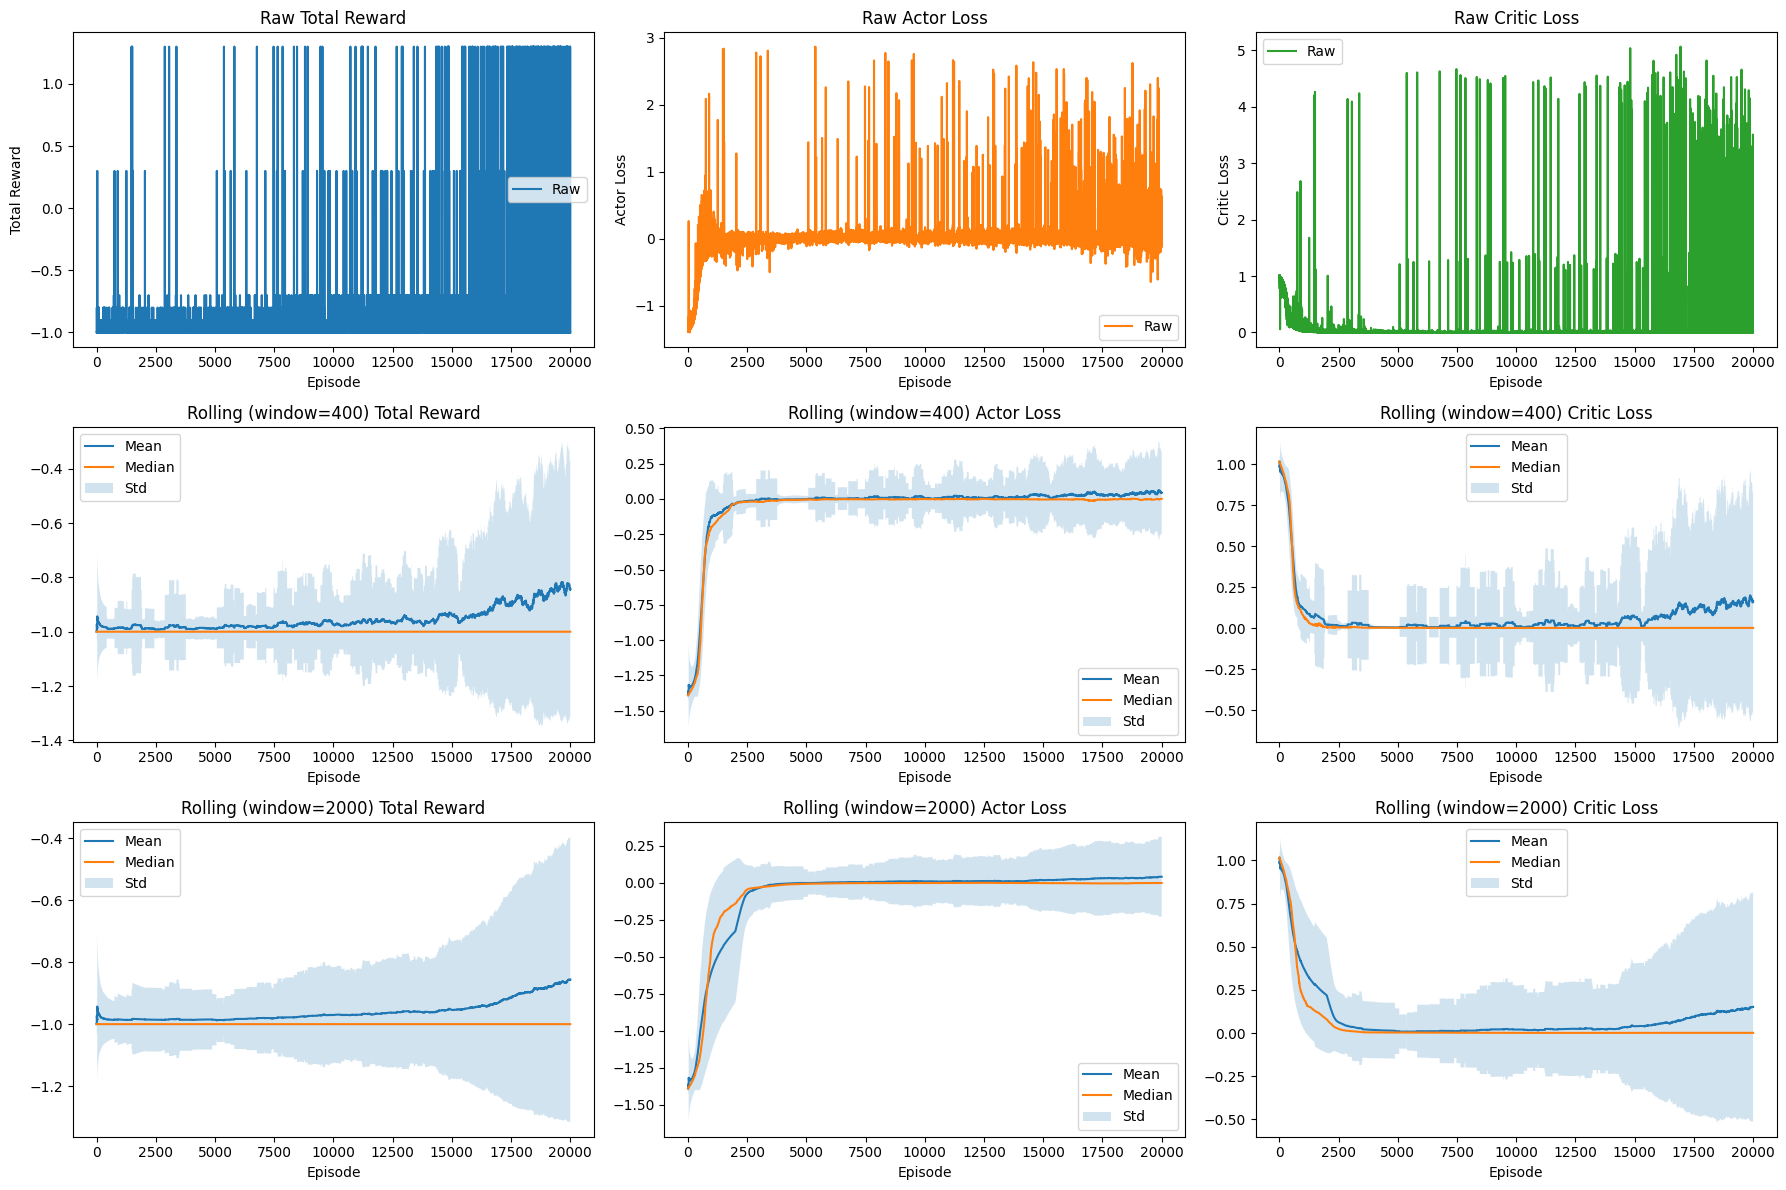

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


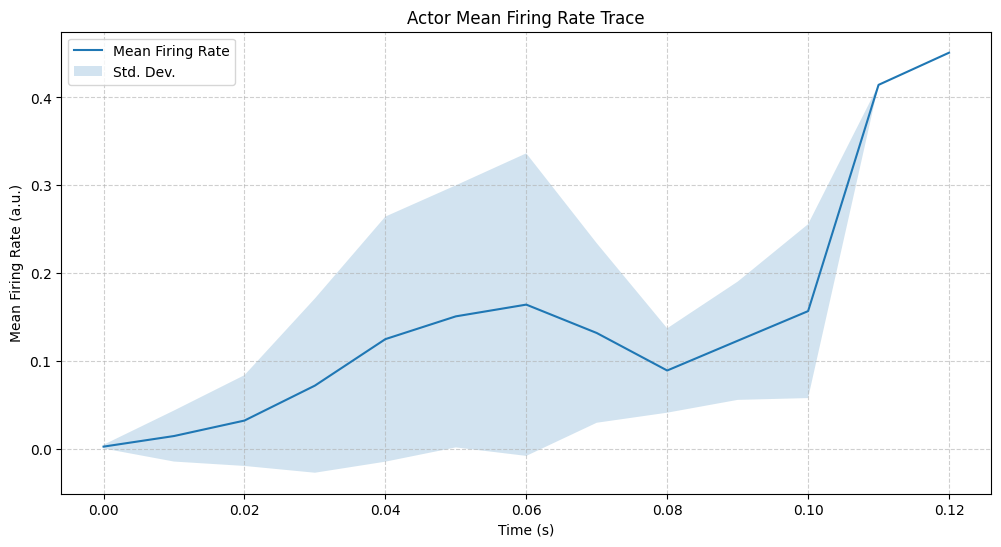


Closing the environment...
Environment closed.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 20000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")
    
    # --- Guardar checkpoint del modelo ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 20000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_2.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 20000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_1/ckpt-1
Checkpoint restored successfully.

Starting training for 20000 episodes...
Episode 100	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: 0.0212	Critic Loss: 0.0007	Actions: [2]	M: 0.6295360127834694	Tau: 3	
Episode 200	Total Reward: -1.00	State [1.        6.3386893 2.1540954]	Actor Loss: -0.1188	Critic Loss: 0.0091	Actions: [3, 2]	M: 0.5788006791219741	Tau: 3	
Episode 300	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.0212	Critic Loss: 0.0008	Actions: [1]	M: 0.6063779443780902	Tau: 3	
Episode 400	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.0184	Critic Loss: 0.0016	Actions: [0, 1]	M: 0.5555831814691985	Tau: 4	
Episode 500	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.0161	Critic Loss: 0.0007	Actions: [2]	M: 0.5633460262253646	Tau: 4	
Episode 600	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.6267	Critic Loss: 2.8715	Actions: [3, 0, 0, 0, 1]	M: 0.5498997151685338	Tau: 4	
Episode 700	Tot

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 10000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...


2025-08-26 11:21:56.564780: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_2/ckpt-1
Checkpoint restored successfully.

Starting training for 10000 episodes...
Episode 100	Total Reward: -1.00	State [0. 0. 0.]	Actor Loss: -0.0029	Critic Loss: 0.0012	Actions: [1]	M: 1.358416916944323	Tau: 1	
Episode 200	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.1643	Critic Loss: 0.4058	Actions: [3, 0, 0, 0, 1]	M: 1.5212639578426093	Tau: 1	
Episode 300	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.2848	Critic Loss: 0.8500	Actions: [0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 0.9999789039110941	Tau: 2	
Episode 400	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.1963	Critic Loss: 0.6750	Actions: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.7363648486057832	Tau: 1	
Episode 500	Total Reward: 1.30	State [0. 0

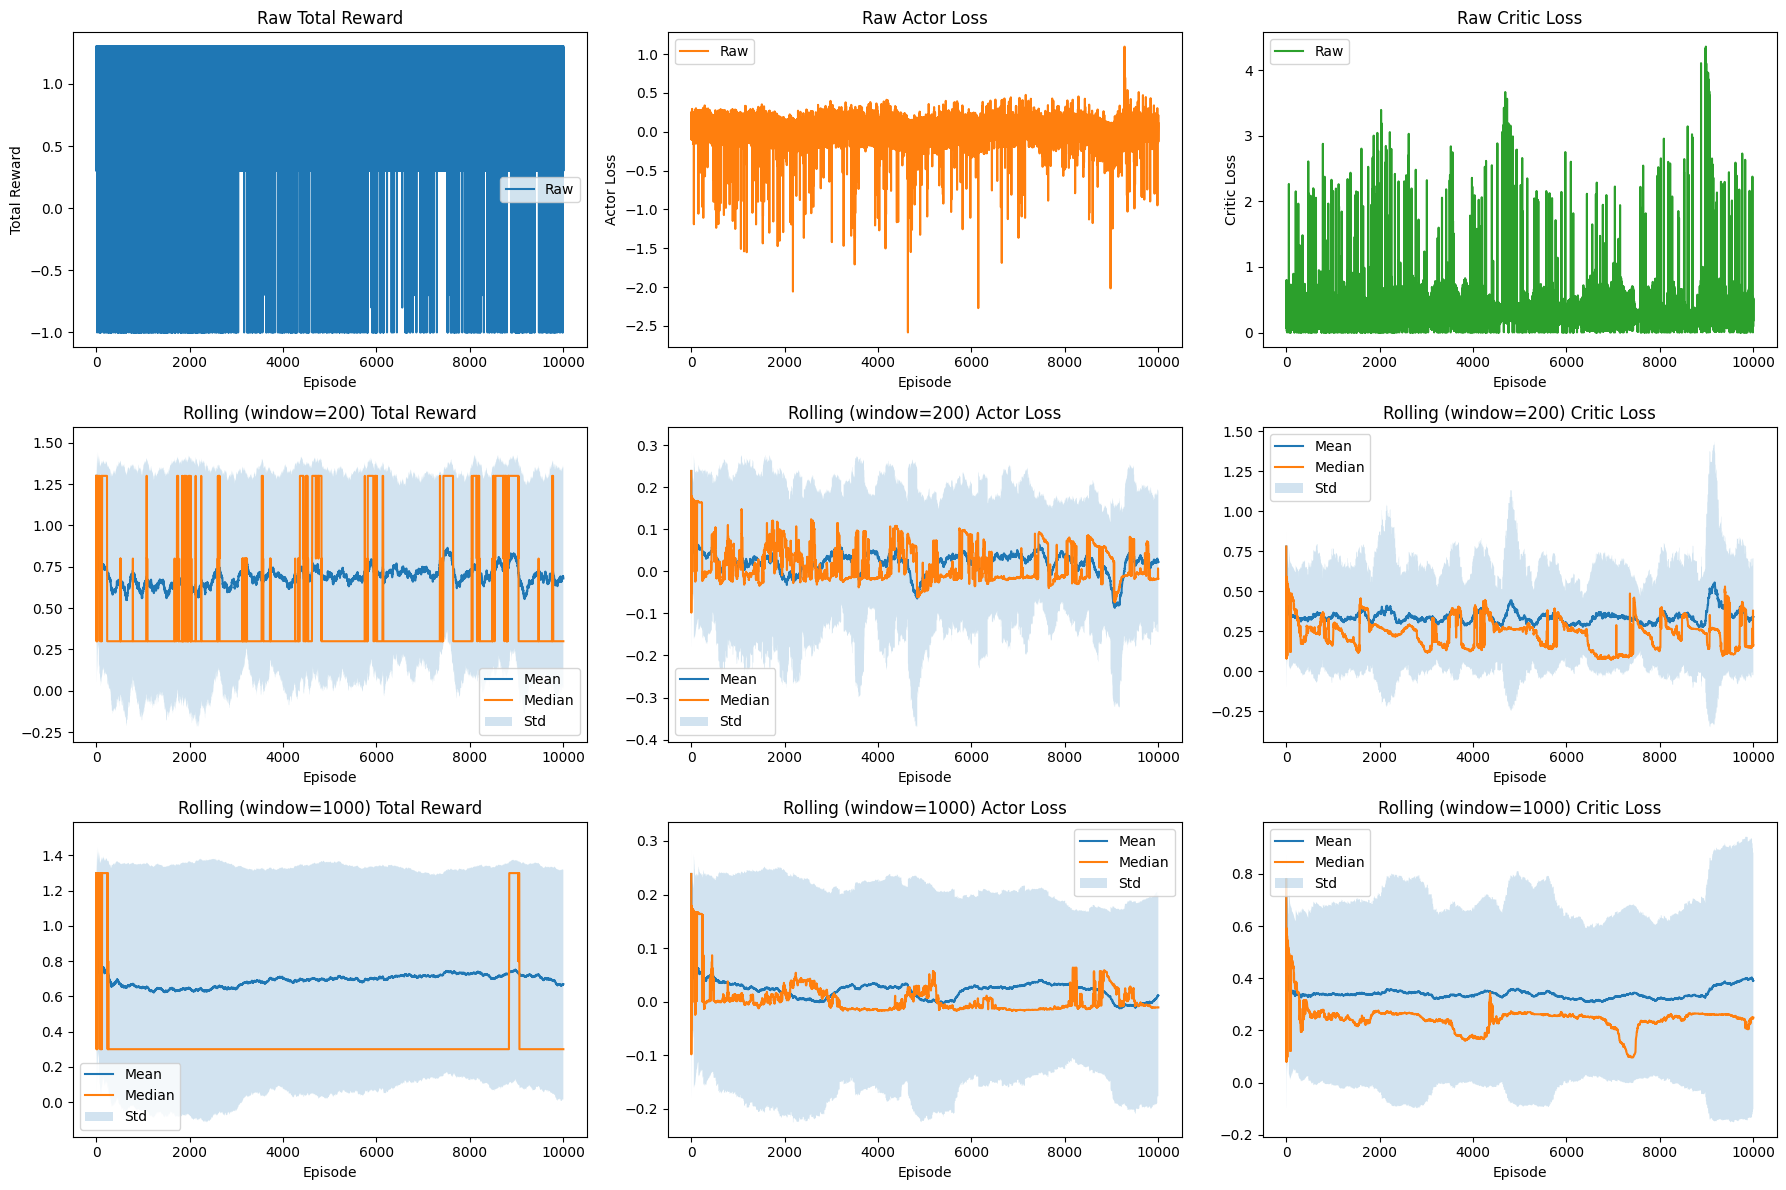

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


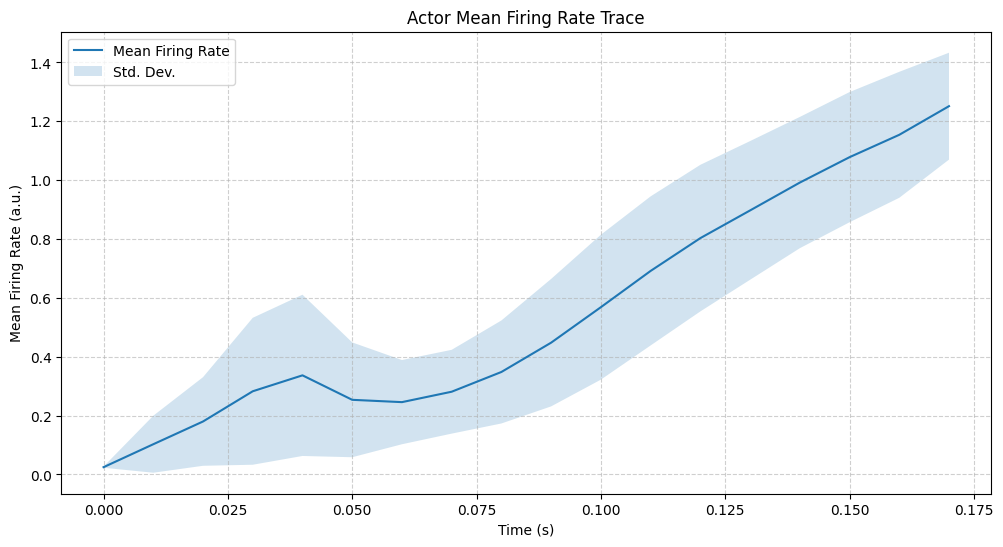


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 10000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_3.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


2025-08-26 15:43:16.294499: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_3/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0282	Critic Loss: 0.0328	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4546819551271875	Tau: 1	
Episode 200	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.1966	Critic Loss: 0.2819	Actions: [3, 0, 0, 0, 1]	M: 1.8075578503944207	Tau: 1	
Episode 300	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0932	Critic Loss: 0.6855	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.2083568121273902	Tau: 2	
Episode 400	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0210	Critic Loss: 0.0658	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.6280340702599279	Tau: 1	
Episode 500	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0340	Critic Loss: 0.1101	Actions: 

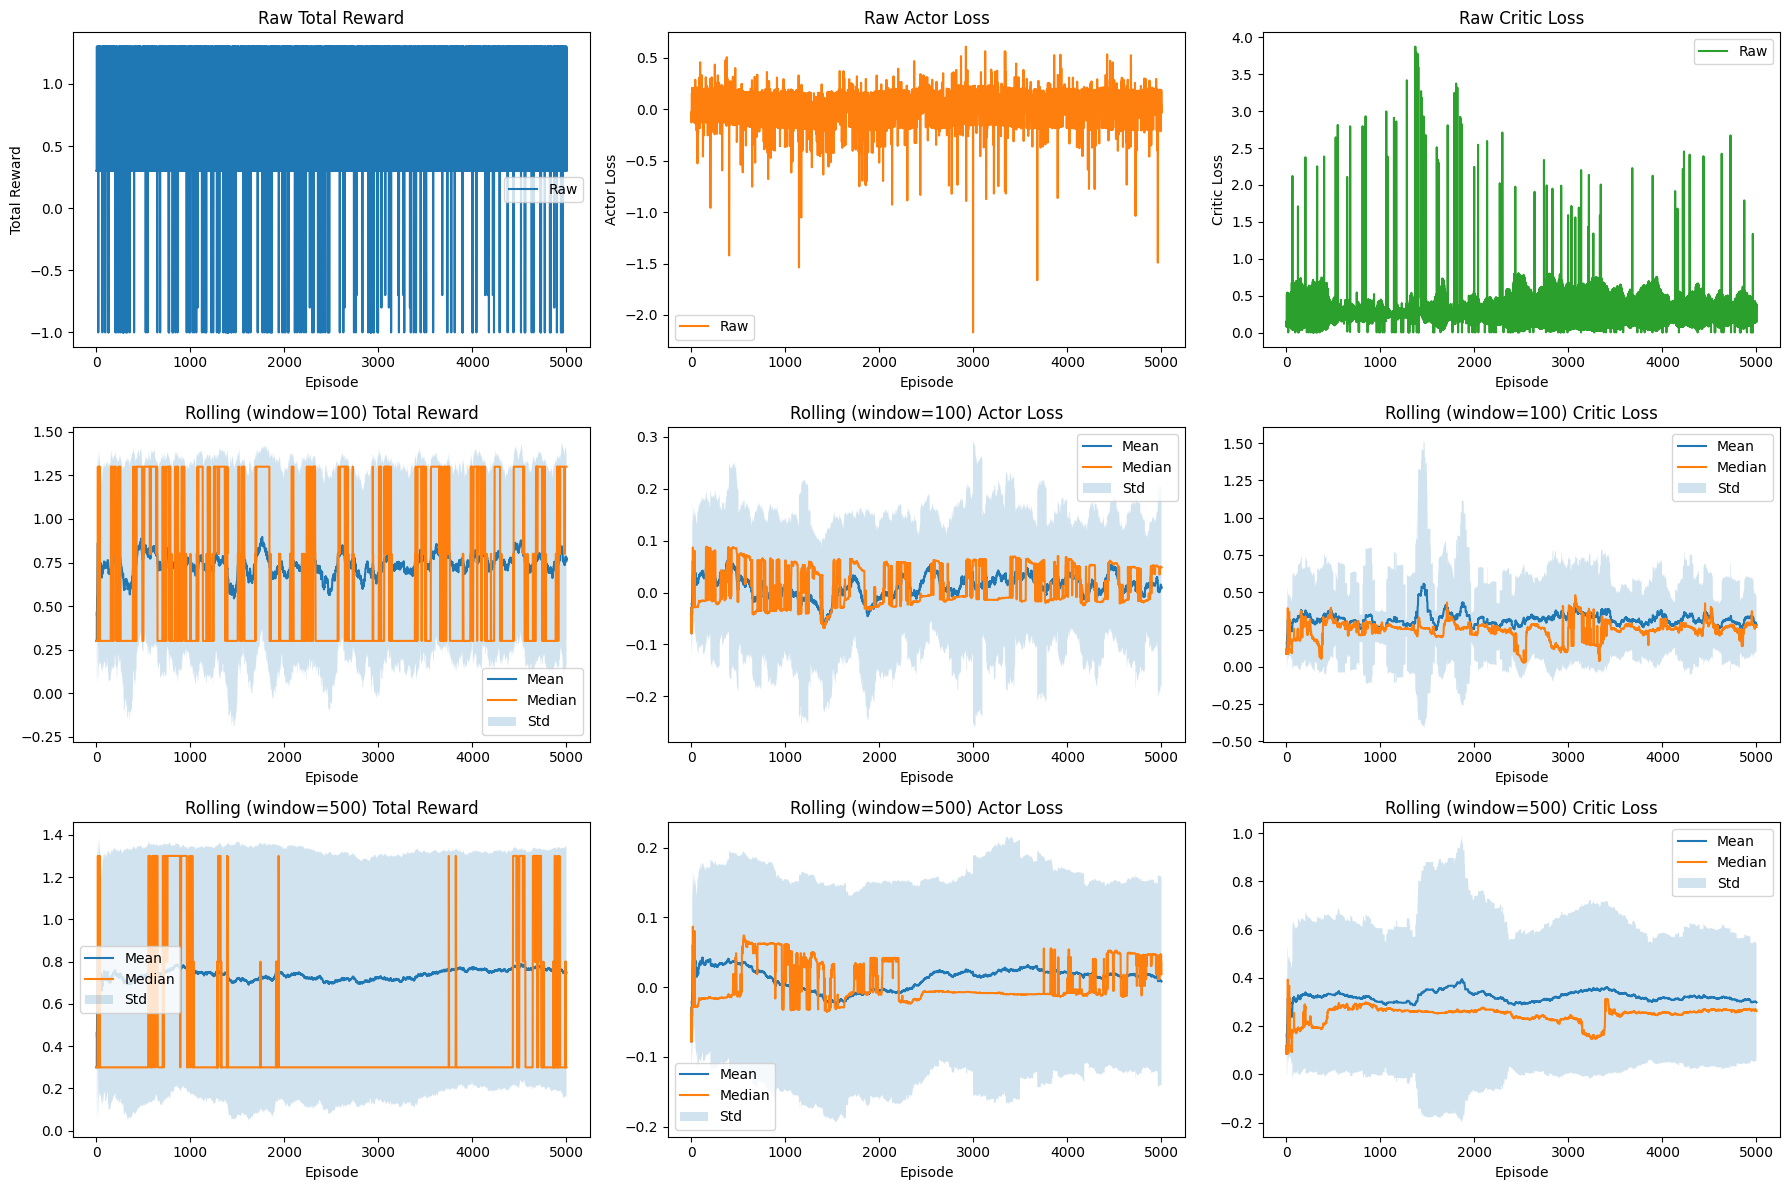

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


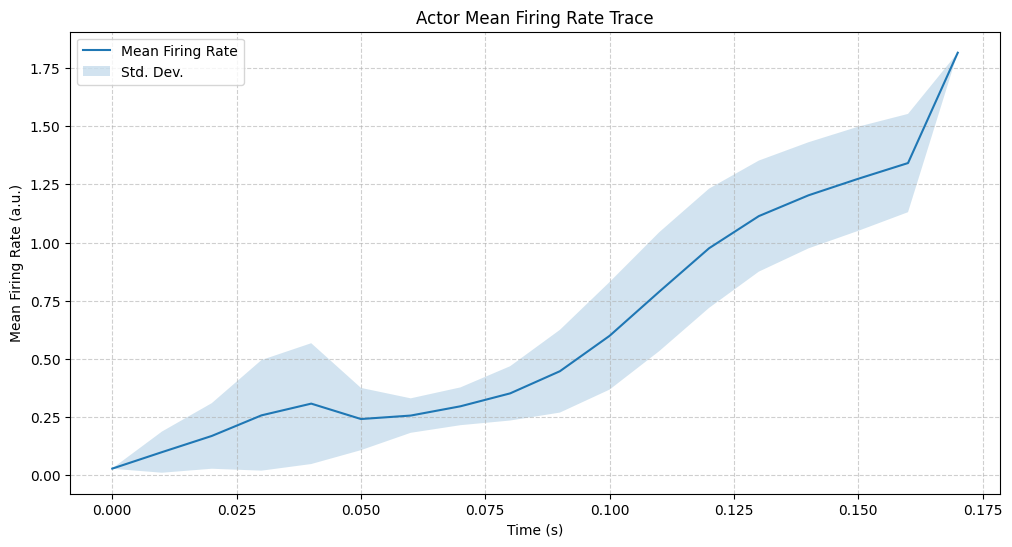


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_4.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_4/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0565	Critic Loss: 0.1005	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.7268616894714424	Tau: 1	
Episode 200	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0508	Critic Loss: 0.5026	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 0.826904201055069	Tau: 2	
Episode 300	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0266	Critic Loss: 0.1276	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 0.7844024113740128	Tau: 3	
Episode 400	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0495	Critic Loss: 0.3854	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.072668102378518	Tau: 2	
Episode 500	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0419	Critic Loss: 0.1738	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,

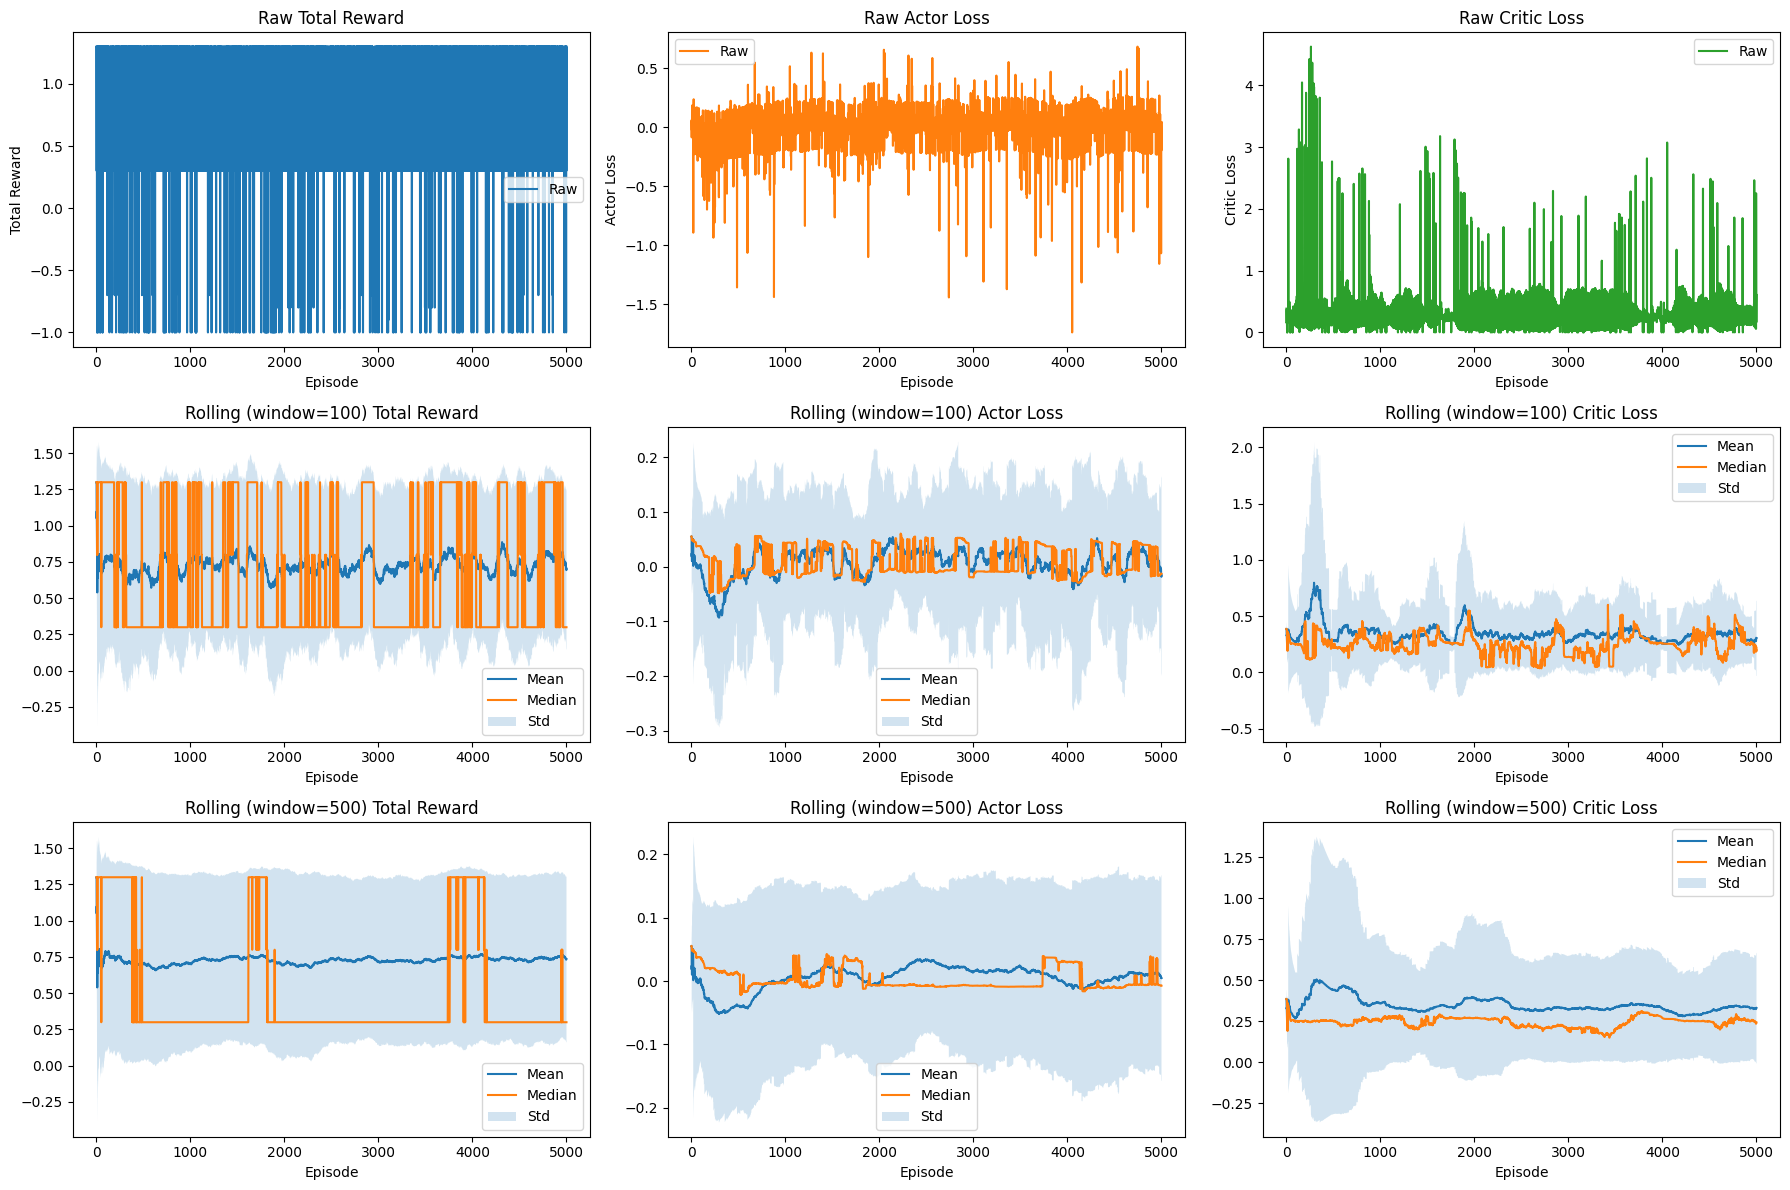

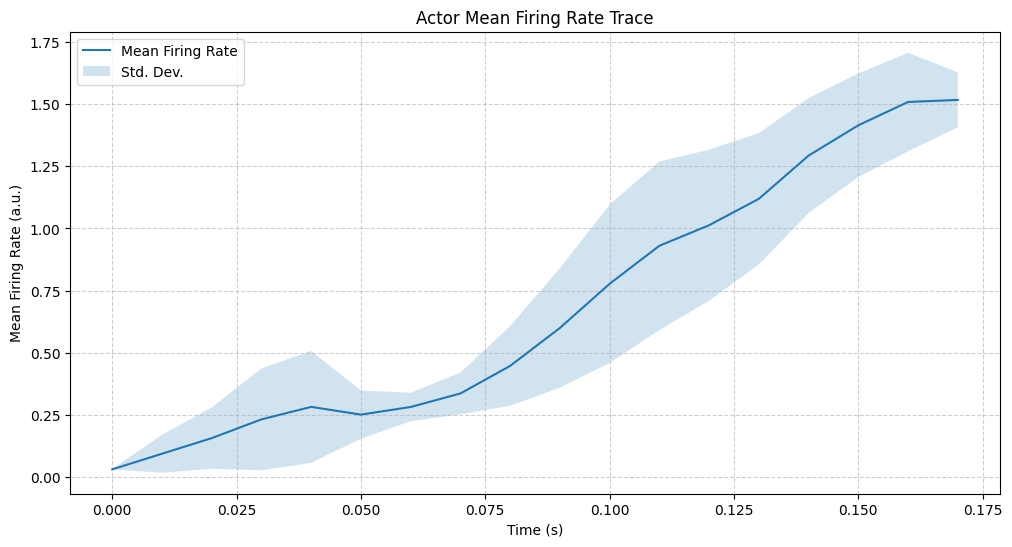


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_5.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...


2025-08-26 19:28:41.159921: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 5...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_5/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0522	Critic Loss: 0.6873	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.7201687194606565	Tau: 1	
Episode 200	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0122	Critic Loss: 0.0486	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.432743396419952	Tau: 1	
Episode 300	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0104	Critic Loss: 0.0169	Actions: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4013956749532113	Tau: 1	
Episode 400	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0571	Critic Loss: 0.5835	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.38852867

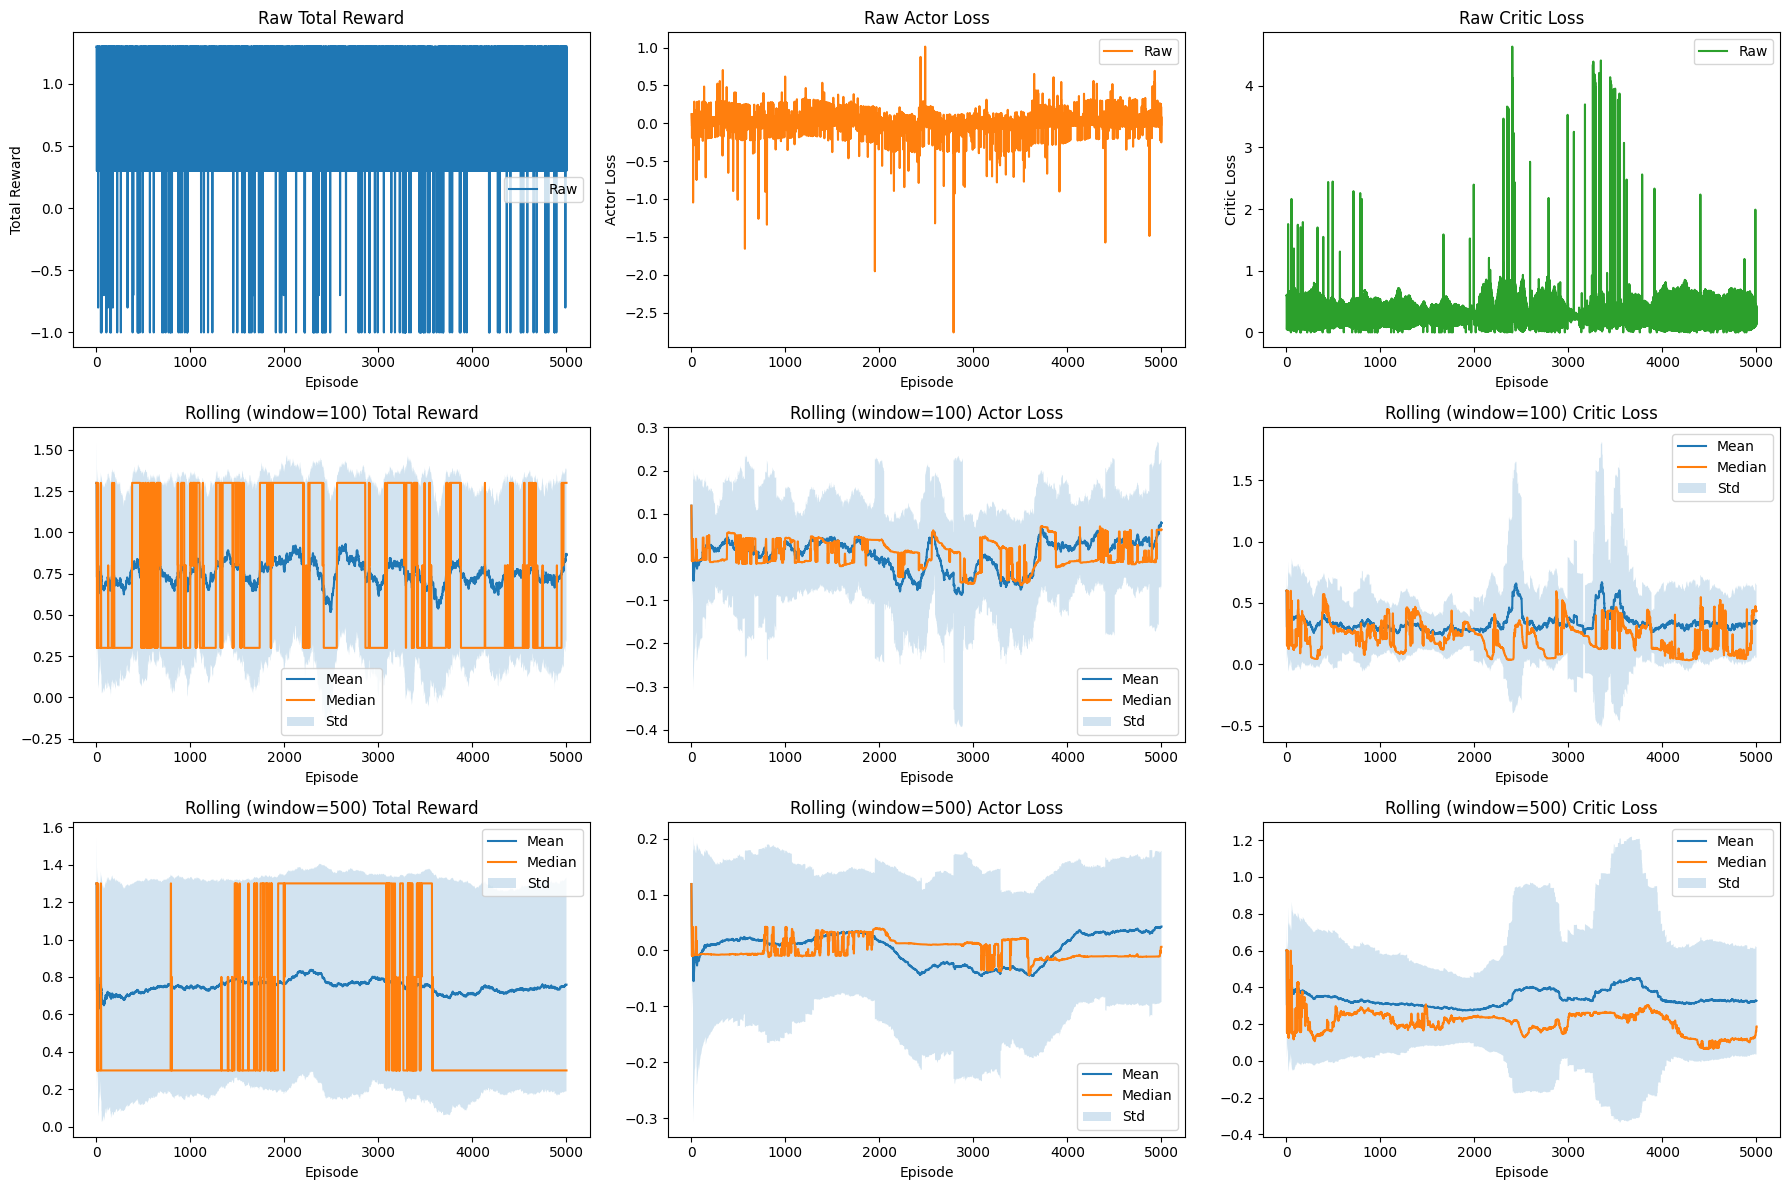

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


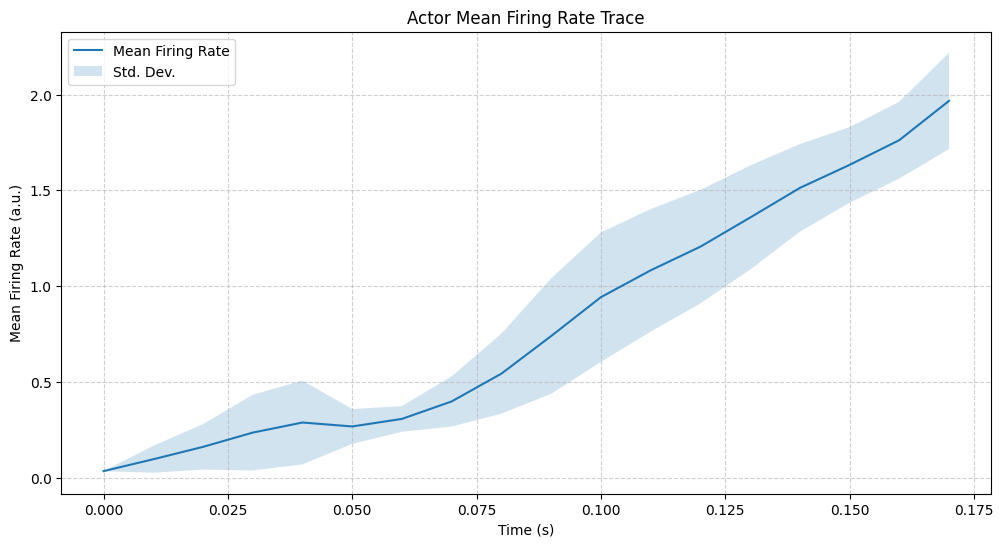


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_6.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 6...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_6/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0775	Critic Loss: 0.7010	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.3189315659421366	Tau: 2	
Episode 200	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0137	Critic Loss: 0.0513	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.3578368970769896	Tau: 1	
Episode 300	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.2142	Critic Loss: 0.1604	Actions: [3, 0, 0, 0, 1]	M: 1.680464102460287	Tau: 1	
Episode 400	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0549	Critic Loss: 0.0384	Actions: [0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.222857971827227	Tau: 2	
Episode 500	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0578	Critic Loss: 0.6331	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.5159981186558278	Tau: 1	
Episode 600	Total Reward: 0.30	State [0. 0. 0.]	Actor L

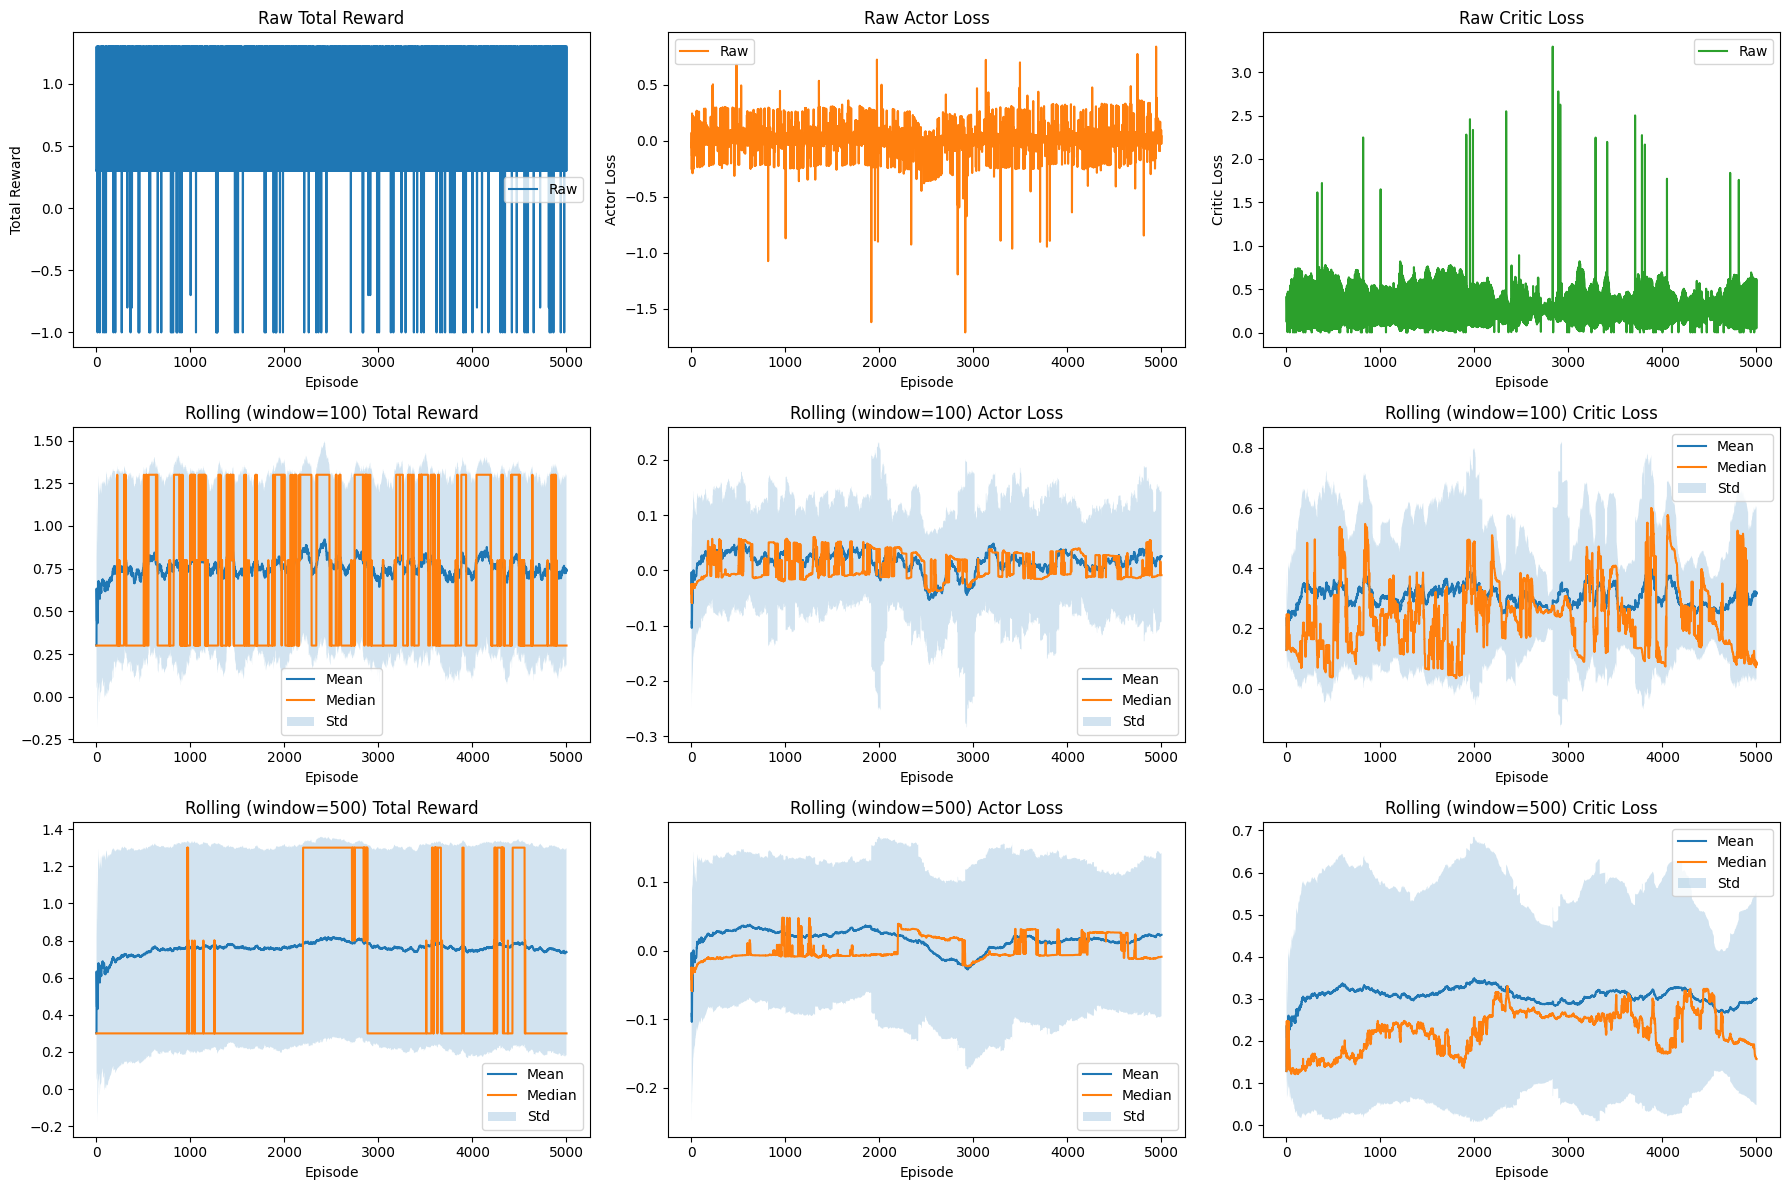

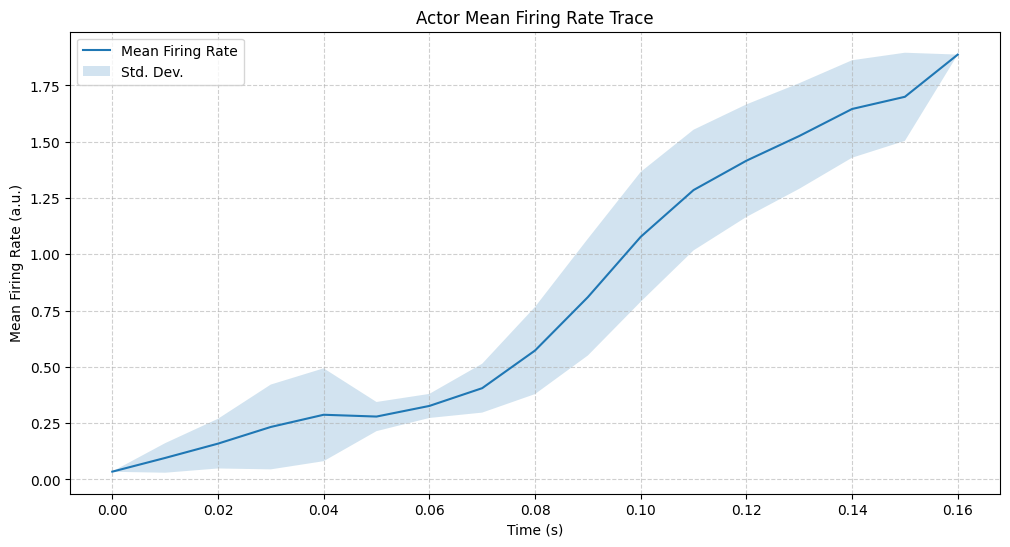


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 7
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_7.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


2025-08-27 10:32:14.972940: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Loading masks from stage 7...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_7/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0130	Critic Loss: 0.0694	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4348654174898354	Tau: 1	
Episode 200	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0078	Critic Loss: 0.0541	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.3025984428798976	Tau: 2	
Episode 300	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.1314	Critic Loss: 0.6649	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.66095099151978	Tau: 1	
Episode 400	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.1833	Critic Loss: 0.7802	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.2754294778507784	Tau: 2	
Episode 500	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: -0.0147	Critic Loss: 0.0352	Actions: [0

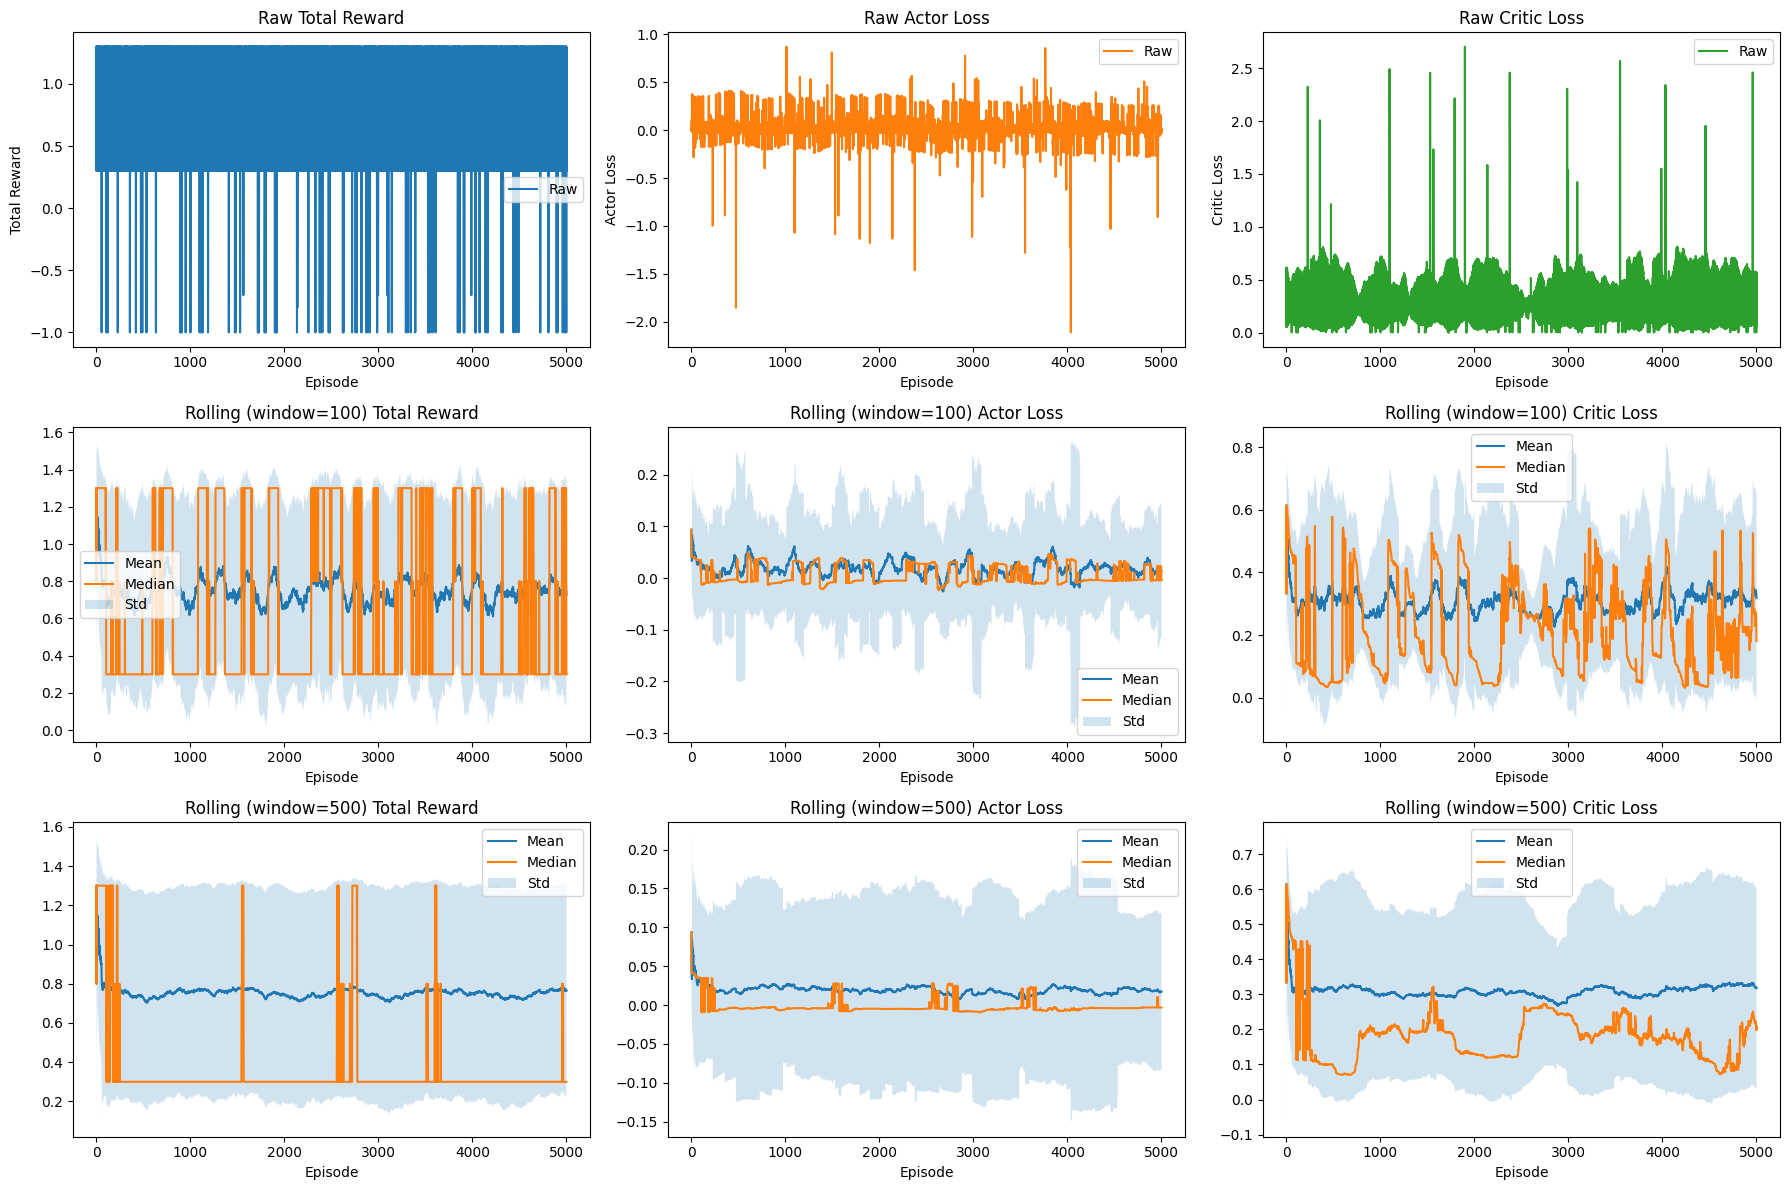

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:956: RuntimeWarning: Mean of empty slice
  mean_rate_per_episode = np.nanmean(firing_rates, axis=0)


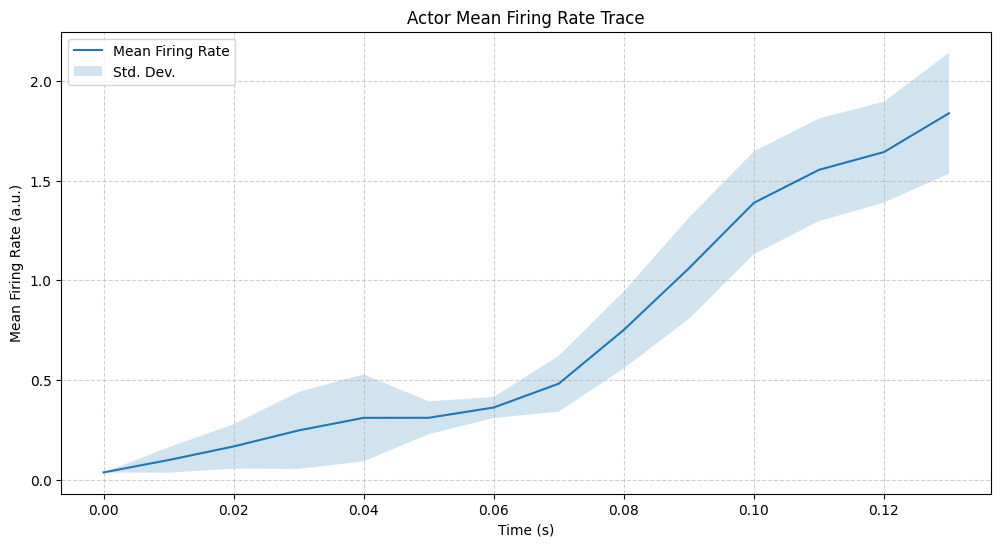


Closing the environment...
Environment closed.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 8
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_8.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 8...
Masks loaded.
Initializing optimizers with dummy step...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_8/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0308	Critic Loss: 0.7286	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4826374728216065	Tau: 1	
Episode 200	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0282	Critic Loss: 0.5465	Actions: [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.546020202876234	Tau: 1	
Episode 300	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0645	Critic Loss: 0.4718	Actions: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.283715334321091	Tau: 2	
Episode 400	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0444	Critic Loss: 0.4706	Actions: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4915235236657218	Tau: 1	
Episode 500	Total Reward: 1.30	State [0. 0. 0.]	Actor Loss: 0.0230	Critic Loss: 0.3200	Actions: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.5806629738441007	Tau: 1	
Episode 600	Total Reward: 1.30	State [0.

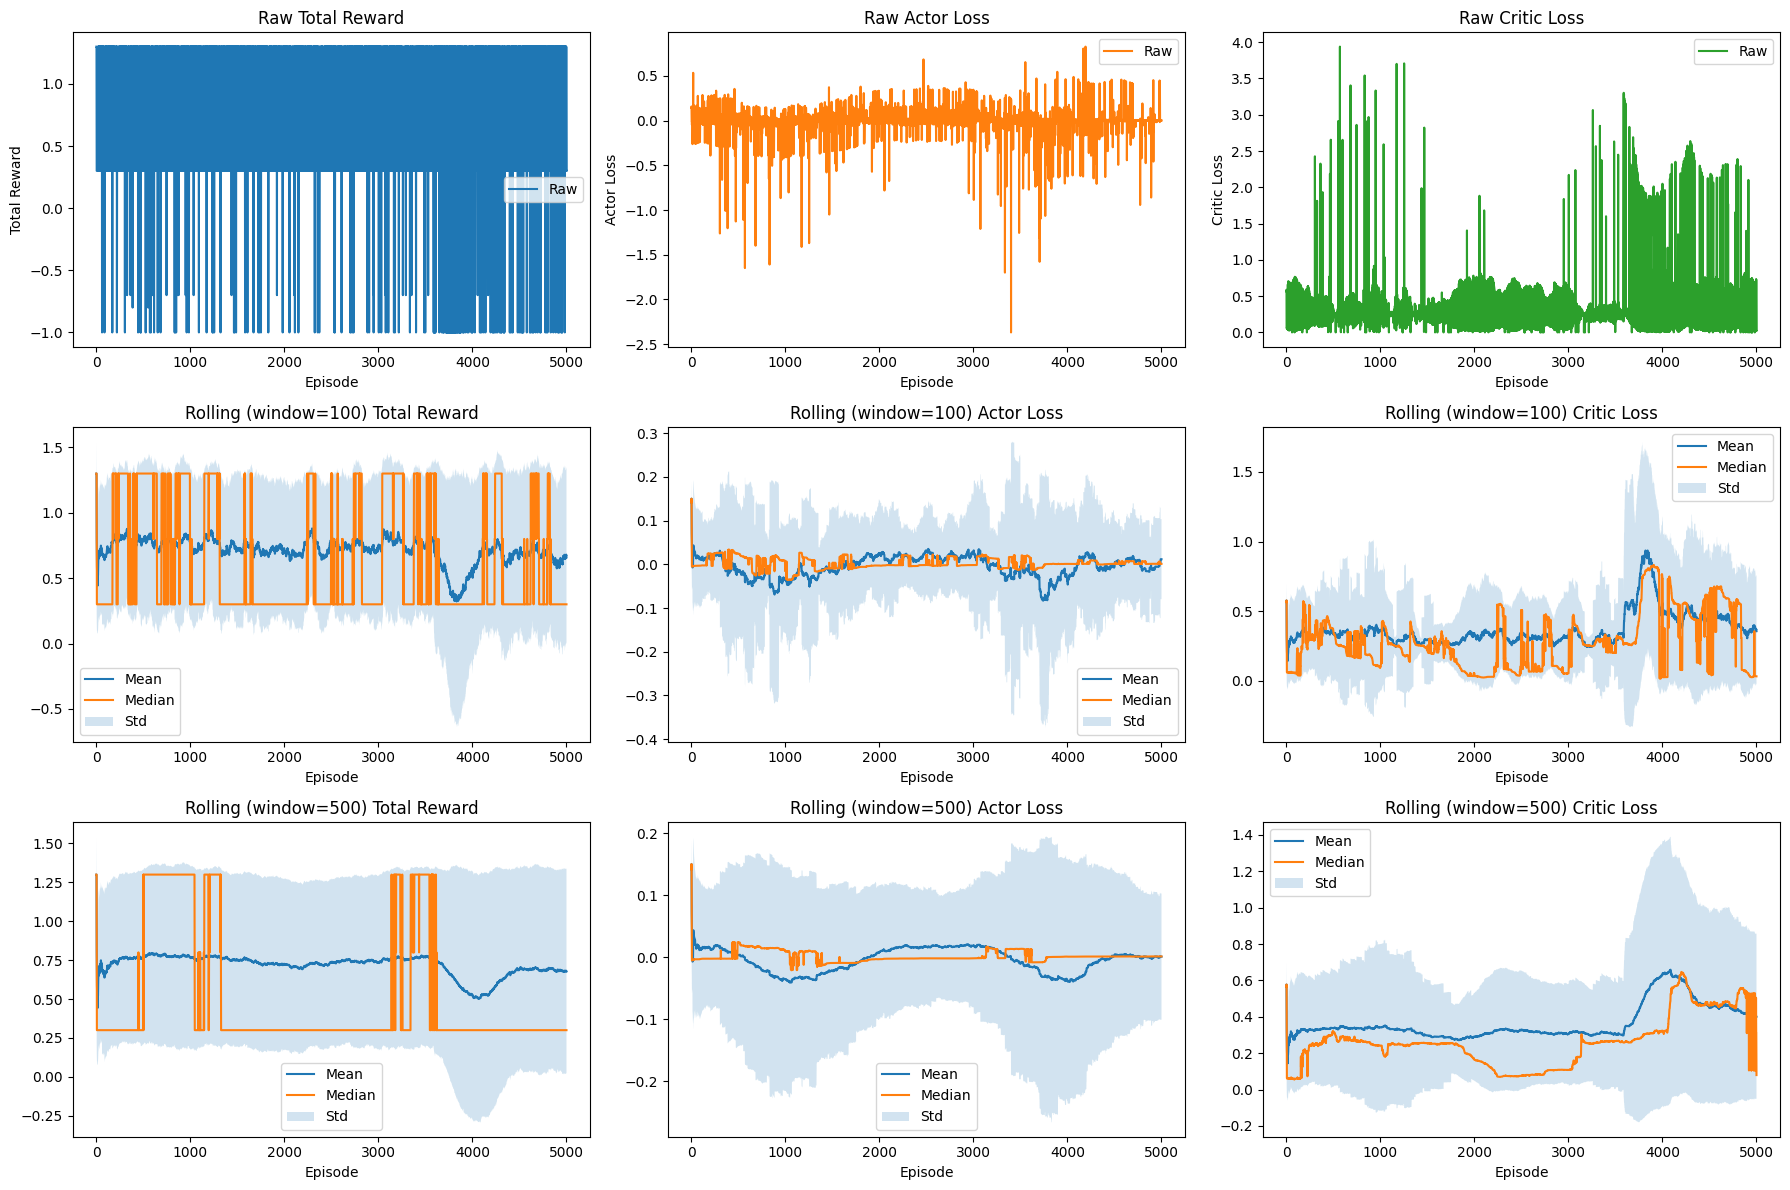

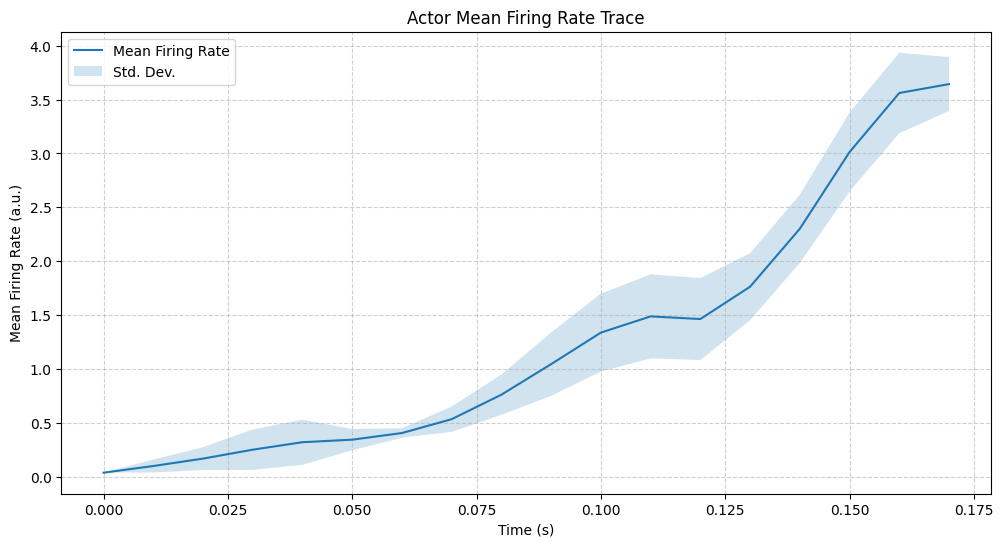


Closing the environment...
Environment closed.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 9
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_9.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Parámetros generales
        "dt": 10,
        "input_noise_sigma": 0.01,
        "duration_params": [10, 10, 10, 10, 10, 10], 
        "num_episodes": 5000,
        "gamma": 1.0,
        "print_interval": 100,
        "record_history": True,

        # Parámetros de recompensa del entorno
        "reward_correct": 1.0,
        "reward_incorrect": 0.0,
        "reward_aborted": -1.0,
        "reward_holding": 0.1,

        # Parámetros del modelo de motivación
        "m_init": 1.0,
        "rho_init": 0.0,
        "kappa": 0.1,
        "epsilon": 0.087,
        "latency_a": 0.02,  # Ajustado para un entorno pequeño
        "latency_noise": 0.0,
        "start_window_steps": 10,

        # Parámetros de la arquitectura del agente
        "actor_hidden_size": 150,
        "critic_hidden_size": 150,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",

        # Parámetros de optimización del agente
        "actor_lr": 1e-4,
        "critic_lr": 1e-4,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4
    }

    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Configuración del Entorno ---
    print("\nCreating WorkingMemory environment...")
    env = WorkingMemoryEnv(
        dt=config["dt"],
        reward_correct=config["reward_correct"],
        reward_incorrect=config["reward_incorrect"],
        reward_aborted=config["reward_aborted"],
        reward_holding=config["reward_holding"],
        input_noise_sigma=config["input_noise_sigma"],
        duration_params=config["duration_params"],
        m_init=config["m_init"],
        rho_init=config["rho_init"],
        kappa=config["kappa"],
        epsilon=config["epsilon"],
        latency_a=config["latency_a"],
        latency_noise=config["latency_noise"],
        start_window_steps=config["start_window_steps"]
    )
    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Configuración del Agente ---
    print("\nInitializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Entrenamiento ---
    print(f"\nStarting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, other_measurements = train_agent(
        env=env,
        agent=agent,
        num_episodes=config["num_episodes"],
        gamma=config["gamma"],
        print_interval=config["print_interval"],
        l2_actor=config["l2_actor"],
        l2_critic=config["l2_critic"],
        record_history=config["record_history"]
    )
    print("\nTraining finished.")

    # --- Guardar checkpoint del modelo ---
    this_stage = 10
    this_ckpt_dir = 'checkpoints/WM2_F_rnn'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / "WM2_F_rnn_10.pkl"
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            other_measurements
        ), f)
    print(f"Training history saved to {output_file}")
        
    # --- Graficar Métricas de Entrenamiento y Rendimiento ---
    print("\nPlotting results...")
    
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config["num_episodes"] // 50),
        window_2=max(50, config["num_episodes"] // 10)
    )

    plot_mean_firing_rate_trace(
        actor_firing_rates,
        dt=config['dt'],
        title="Actor Mean Firing Rate Trace"
    )

    # --- Cerrar el Entorno ---
    print("\nClosing the environment...")
    env.close()
    print("Environment closed.")


if __name__ == '__main__':
    main()

Configuration loaded:
  dt: 10
  input_noise_sigma: 0.01
  duration_params: [10, 10, 10, 10, 10, 10]
  num_episodes: 5000
  gamma: 1.0
  print_interval: 100
  record_history: True
  reward_correct: 1.0
  reward_incorrect: 0.0
  reward_aborted: -1.0
  reward_holding: 0.1
  m_init: 1.0
  rho_init: 0.0
  kappa: 0.1
  epsilon: 0.087
  latency_a: 0.02
  latency_noise: 0.0
  start_window_steps: 10
  actor_hidden_size: 150
  critic_hidden_size: 150
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_lr: 0.0001
  critic_lr: 0.0001
  l2_actor: 0.0001
  l2_critic: 0.0001

Creating WorkingMemory environment...
Observation size: 3, Action size: 4

Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Loading masks from stage 9...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/WM2_F_rnn_9/ckpt-1
Checkpoint restored successfully.

Starting training for 5000 episodes...
Episode 100	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: 0.0015	Critic Loss: 0.0181	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.0941902176485645	Tau: 2	
Episode 200	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: 0.0010	Critic Loss: 0.0285	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.4358319916438325	Tau: 1	
Episode 300	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: 0.0008	Critic Loss: 0.0367	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.6080846355399352	Tau: 1	
Episode 400	Total Reward: 0.30	State [0. 0. 0.]	Actor Loss: 0.0010	Critic Loss: 0.0298	Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1]	M: 1.5351703561511345	Tau: 1	
Episode 500	Total Reward: 0.30	State [0. 0. 0.]	Actor 